# Project 3: Classification with Logistic Regression and SVM

Before we start, please put your name and CUID in following format

: Firstname LASTNAME, #00000000   //   e.g. Nianyi LI, #12345678

**Your Answer:**   
Pallavi RAGURI, #C10370523

# General Rules of the Project Submission

Python 3 and [Matplotlib](https://matplotlib.org/) will be used throughout the semseter, so it is important to be familiar with them. It is strongly suggested to go through [Stanford CS231n](http://cs231n.github.io/python-numpy-tutorial/) and [CS228](https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb) for more detailed Python and numpy tutorials if you haven't had used Python before. 

In some cells and files you will see code blocks that look like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
pass
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

You should replace the `pass` statement with your own code and leave the blocks intact, like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
y = m * x + b
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

When completing the notebook, please adhere to the following rules:
- Do not write or modify any code outside of code blocks
- Follow the instruction of the project description carefully
- Run all cells before submitting. <span style="color:red">**You will only get credit for code that has been run!**.</span>

The last point is extremely important and bears repeating:

### We will not re-run your notebook -- <span style="color:red">you will only get credit for cells that have been run</span>

### File name
Your Python program should be named **yourlastname_yourfirstname_P3.ipynb**, then zip it and upload to Canvas

# Project Description

For this project we will apply both **Logistic Regression** and **SVM** to predict whether capacitors from a fabrication plant pass quality control based (QC) on two different tests. To train your system and determine its reliability you have a set of 118 examples. The plot of these examples is show below where a red x is a capacitor that failed QC and the green circles represent capacitors that passed QC.

<div>
<img src="https://nianyil.people.clemson.edu/CPSC_4430/P3_new.png" width="500"/>
</div>


## Data File

Two text files with the data is available on Canvas: a training set of 85 examples and a test set of 33 examples. Both are formatted as
- First line: **m** and **n**, tab separated
- Each line after that has two real numbers representing the results of the two tests, followed by a *1.0* if the capacitor *passed* QC and a *0.0* if it *failed* QC—tab separated.

You need to write a code to read data from the file. You **can** use packages, such as **panda**, to load the data.


In [1]:
##############################################################################
#         TODO: Write the code for reading data from file                    #
##############################################################################
import pandas as pd

training_file = "P3train.txt"
testing_file = "P3test.txt"

train_data = pd.read_csv(training_file, sep="\t")  
test_data = pd.read_csv(testing_file, sep="\t")
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Your assignment is to use what you have learned from the class slides and homework to create (**from scratch in Python**, not by using Logistic Regression library function!) a **Logistic Regression** and **SVM** binary classifier to predict whether each capacitor in the test set will pass QC. 

## Logistic Regression

You are free to use any model variation and any testing or training approach we have discussed for logistic regression. In particular, since this data is not linear, I assume you will want to add new features based on power of the original two features to create a good decision boundary. $w_0 + w_1x_1 + w_2x_2$ is not going to work!
One choice might be
- $\textbf{w}^T \textbf{x} = w_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 +w_6x_6 + w_7x_7 + w_8x_8$    where the new features are created as follows:

| New Features |From Original Features |
| --- | --- |
|$x_1$	| $x_1$|
|$x_2$	| $x_1^2$|
|$x_3$	| $x_2$||
|$x_4$	| $x_1x_2$|
|$x_5$	| $x_1x_2^2$|
|$x_6$	| $x_2^2$|
|$x_7$	| $x_1^2x_2$|
|$x_8$	| $x_1^2x_2^2$|

Note that it is easy to create a small Python program that reads in your  original features, uses a nested loop to create the new features and then writes them to a file:

```python
thePower = 2
for j in range(thePower+1): 
    for i in range(thePower+1):
        temp = (x1**i)*(x2**j)
        if (temp != 1):
            fout1.write(str(temp)+"\t") fout1.write(str(y)+"\n")
```

With a few additions to the code, you can make a program to create combinations of any powers of $x_1$ and $x_2$!

In [2]:
##############################################################################
#           TODO: Define the Logistic regression models                      #
##############################################################################

import numpy as np
import pandas as pd

def transform_input_data(input_filename):
    with open(input_filename) as f:
        first_line = f.readline()
        dimensions = first_line.split("\t")
        num_samples = int(dimensions[0])
        num_features = int(dimensions[1]) + 1
        raw_data = np.zeros([num_samples, num_features])
        
        for i in range(num_samples):
            current_line = f.readline()
            values = current_line.split("\t")
            for j in range(num_features):
                raw_data[i, j] = float(values[j])

    output_filename = input_filename.split('.')[0] + "_processed.txt"
    with open(output_filename, "w") as out_file:
        degree = 2
        for i in range(num_samples):
            feat1 = raw_data[i][0]
            feat2 = raw_data[i][1] 
            label = raw_data[i][2]
            for k in range(degree + 1):
                for m in range(degree + 1):
                    term = (feat1**m) * (feat2**k)
                    if term != 1:
                        out_file.write(str(term) + "\t")
            out_file.write(str(label) + "\n")

    with open(output_filename, "r") as processed_file:
        first_line = processed_file.readline()
        values = first_line.split("\t")
        expanded_features = num_features + 6
        processed_data = np.zeros([num_samples, expanded_features])
        for i in range(num_samples - 1):
            current_line = processed_file.readline()
            values = current_line.split("\t")
            for j in range(expanded_features):
                processed_data[i, j] = float(values[j])
    
    return processed_data

train_processed = transform_input_data(training_file)
train_df = pd.DataFrame(train_processed, columns=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'target'])
X_train_features = train_df.iloc[:, :8]
y_train_labels = train_df.iloc[:, 8:]

X_train_matrix = X_train_features.values.T
y_train_matrix = y_train_labels.values.reshape(1, X_train_matrix.shape[1])

test_processed = transform_input_data(testing_file)
test_df = pd.DataFrame(test_processed, columns=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'target'])
X_test_features = test_df.iloc[:, :8]
y_test_labels = test_df.iloc[:, 8:]

X_test_matrix = X_test_features.values.T
y_test_matrix = y_test_labels.values.reshape(1, X_test_matrix.shape[1])
  
    
print("Training features shape:", X_train_matrix.shape)
print("Training labels shape:", y_train_matrix.shape)
print("Test features shape:", X_test_matrix.shape)
print("Test labels shape:", y_test_matrix.shape)

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Training features shape: (8, 85)
Training labels shape: (1, 85)
Test features shape: (8, 33)
Test labels shape: (1, 33)


## Optimization using Gradient Decent

Once you have defined the logistic regression model, you need to find the weights using the Gradient Decent algorithm. You need to implement the Vanilla Gradient Decent from scratch in Python.

You need to specify the hyperparameters of GD, and plot the training loss curve (**J-curve**). The loss function should be the binary cross-entropy loss function that we introduced.

In [5]:
##############################################################################
#           TODO: Implement the Gradient Decent Algorithm                    #
##############################################################################
# Define the hyperparameters:
# Numbers of epoch (epoch_num), learning rate (lr), and the initial weights(w)
import matplotlib.pyplot as plt

num_iterations = 35000
learning_rate = 0.1
loss_history = []
initial_weights = np.zeros((X_train_matrix.shape[0], 1))

# Define loss function
def binary_cross_entropy(predictions, targets):
    return -(1 / X_train_matrix.shape[1]) * np.sum(targets * np.log(predictions) + (1-targets) * np.log(1 - predictions))

# Define gradient computation
def compute_gradient(weights, predictions):
    return (1 / X_train_matrix.shape[1]) * np.dot(predictions - y_train_matrix, X_train_matrix.T)

# Implement gradient descent optimization
def optimize_weights(iterations, learning_rate, weights, loss_history):
    bias = 0
    for iteration in range(iterations):
        # Forward computation
        z_values = np.dot(weights.T, X_train_matrix) + bias
        predictions = activation_function(z_values)
        current_loss = binary_cross_entropy(predictions, y_train_matrix)
        
        # Update parameters
        gradient = compute_gradient(weights, predictions)
        weights = weights - learning_rate * gradient.T
        bias = bias - learning_rate * (1 / X_train_matrix.shape[1]) * np.sum(predictions - y_train_matrix)
        
        # Track progress
        loss_history.append(current_loss)
        if iteration % 500 == 0:
            print(f"Iteration {iteration}, Loss: {current_loss}")
    
    return weights, loss_history, bias

def activation_function(x):
    return 1 / (1 + np.exp(-x))

optimized_weights, loss_history, bias = optimize_weights(num_iterations, learning_rate, initial_weights, loss_history)

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Iteration 0, Loss: 0.6931471805599454
Iteration 500, Loss: 0.5805728821826317
Iteration 1000, Loss: 0.5222485802202225
Iteration 1500, Loss: 0.48752859748122956
Iteration 2000, Loss: 0.46516890283911233
Iteration 2500, Loss: 0.4498611680281046
Iteration 3000, Loss: 0.43888135586583527
Iteration 3500, Loss: 0.430717668509328
Iteration 4000, Loss: 0.4244734793361516
Iteration 4500, Loss: 0.41958714427902105
Iteration 5000, Loss: 0.4156907355686158
Iteration 5500, Loss: 0.41253416078745436
Iteration 6000, Loss: 0.40994211719804263
Iteration 6500, Loss: 0.4077885049532903
Iteration 7000, Loss: 0.40598059702609635
Iteration 7500, Loss: 0.40444890239852915
Iteration 8000, Loss: 0.4031404786647648
Iteration 8500, Loss: 0.40201440429230567
Iteration 9000, Loss: 0.4010386425397483
Iteration 9500, Loss: 0.4001878252140609
Iteration 10000, Loss: 0.3994416582683599
Iteration 10500, Loss: 0.39878375631926627
Iteration 11000, Loss: 0.39820077839656665
Iteration 11500, Loss: 0.39768177871525695
Itera

Next, print out the final weights and plot the **J-curve/Loss curve** of training. 

Optimized weights:
[[ 1.72350222]
 [-8.81327051]
 [ 3.39912608]
 [-7.36824022]
 [-1.20353708]
 [-8.35773084]
 [ 3.07080967]
 [-3.117749  ]]


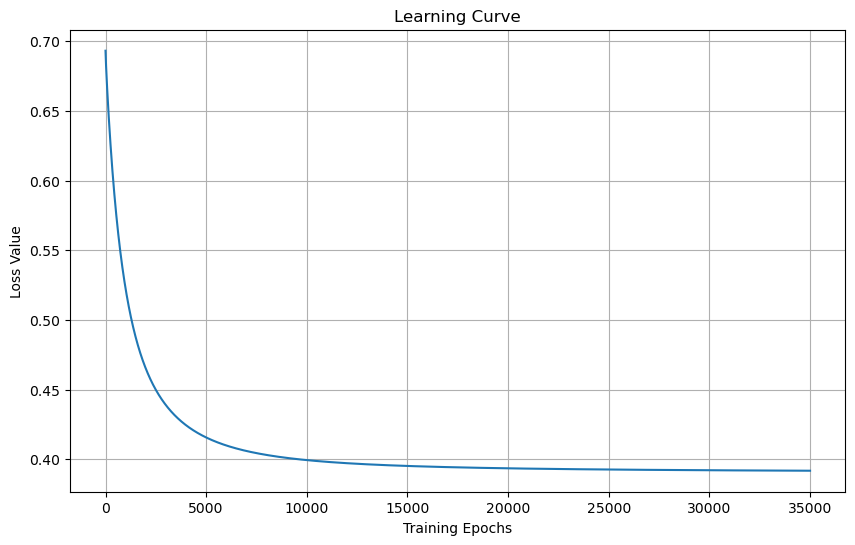

In [6]:
# Display final model parameters
print("Optimized weights:")
print(optimized_weights)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.xlabel('Training Epochs')
plt.ylabel('Loss Value')
plt.title('Learning Curve')
plt.grid(True)
plt.show()
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Based on your data and plot, you should then briefly discuss how you can ensure that the model is well trained.

**Your Answer:**  The model was trained for 35,000 epochs with a learning rate set at 0.1. The graph illustrates that the loss consistently decreased as the number of epochs increased, ultimately stabilizing at the conclusion of the training period. This indicates that the model has been trained successfully.

## Model Evaluation

Evaluate the performance on testing set:
- Print out the confusion matrix
- Calculate and print out the *accuracy*, *precision*, *recall*, and *F1* value of your model

**Note that:**
- For **undergrads** *(CPSC 4430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**70%**</span>
- For **graduate-level** *(CPSC 6430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**85%**</span>


In [7]:
##############################################################################
#                           TODO: Model Evaluation                           #
##############################################################################

import numpy as np

print(optimized_weights.T.shape)
print(X_test_matrix.shape)

y_test_matrix = y_test_matrix.T
test_predictions = np.array(activation_function(np.dot(optimized_weights.T, X_test_matrix)+bias)>0.5, dtype='int64').T

with open('P3test.txt', 'r') as test_file:
    sample_count = int(test_file.readline().split('\t')[0])

true_pos, true_neg, false_pos, false_neg = 0, 0, 0, 0

for actual, predicted in zip(y_test_matrix, test_predictions):
    if actual == 0 and predicted == 1:
        false_pos += 1
    elif actual == 1 and predicted == 0:
        false_neg += 1
    elif actual == 1 and predicted == 1:
        true_pos += 1
    else:
        true_neg += 1
        
results = pd.DataFrame(columns = ['True Class 1', 'True Class 0'])
results.loc['Predicted 1', 'True Class 1'] = true_pos
results.loc['Predicted 0', 'True Class 0'] = true_neg
results.loc['Predicted 1', 'True Class 0'] = false_pos
results.loc['Predicted 0', 'True Class 1'] = false_neg
print(results)

model_accuracy = (true_pos+true_neg)/(true_pos+true_neg+false_pos+false_neg)
model_precision = (true_pos/(true_pos+false_pos))
model_recall = (true_pos/(true_pos+false_neg))
model_f1 = 2*(1/((1/model_precision) + (1/model_recall)))

X_test_copy = X_test_matrix
y_test_copy = y_test_matrix

print(f"Model Accuracy: {model_accuracy*100:.2f}%")
print(f"Model Precision: {model_precision*100:.2f}%")
print(f"Model Recall: {model_recall*100:.2f}%")
print(f"Model F1 Score: {model_f1*100:.2f}%")

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

(1, 8)
(8, 33)
            True Class 1 True Class 0
Predicted 1           15            3
Predicted 0            1           14
Model Accuracy: 87.88%
Model Precision: 83.33%
Model Recall: 93.75%
Model F1 Score: 88.24%


## Support Vector Machine (SVM)

In this part, you need to use the previous training and testing data file. 

You are **allowed** to use the svm functions in the **Scikit-learn** library and don’t need to implement the algorithm from scratch.

- You need to try at least **three** different kernel functions of SVM, and pick the **best** model.
- You need to print out the final weights got from your best SVM model.

**Note that:**
- For **undergrads** *(CPSC 4430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**70%**</span>
- For **graduate-level** *(CPSC 6430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**85%**</span>

In [8]:
##############################################################################
#                      TODO: Classfication using SVM                         #
##############################################################################

import numpy as np
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


training_data = np.loadtxt('P3train.txt', delimiter='\t', skiprows=1)
testing_data = np.loadtxt('P3test.txt', delimiter='\t', skiprows=1)

train_features = training_data[:, :-1]
train_labels = training_data[:, -1]
test_features = testing_data[:, :-1]
test_labels = testing_data[:, -1]

feature_scaler = StandardScaler()
train_features = feature_scaler.fit_transform(train_features)
test_features = feature_scaler.transform(test_features)

linear_model = svm.SVC(kernel='linear', C=10, gamma=0.1)
polynomial_model = svm.SVC(kernel='poly', C=10, gamma=0.1)
rbf_model = svm.SVC(kernel='rbf', C=10, gamma=0.1)

linear_model.fit(train_features, train_labels)
polynomial_model.fit(train_features, train_labels)
rbf_model.fit(train_features, train_labels)

linear_predictions = linear_model.predict(test_features)
polynomial_predictions = polynomial_model.predict(test_features)
rbf_predictions = rbf_model.predict(test_features)

linear_accuracy = accuracy_score(test_labels, linear_predictions)
polynomial_accuracy = accuracy_score(test_labels, polynomial_predictions)
rbf_accuracy = accuracy_score(test_labels, rbf_predictions)


print(linear_accuracy)
print(polynomial_accuracy)
print(rbf_accuracy)
print()
print(f"Linear SVM Accuracy: {linear_accuracy*100:.2f}%")
print(f"Polynomial SVM Accuracy: {polynomial_accuracy*100:.2f}%")
print(f"RBF SVM Accuracy: {rbf_accuracy*100:.2f}%")

model_comparison = [(linear_model, linear_accuracy, "Linear SVM"), 
                   (polynomial_model, polynomial_accuracy, "Polynomial SVM"), 
                   (rbf_model, rbf_accuracy, "RBF SVM")]
top_model, top_accuracy, top_type = max(model_comparison, key=lambda x:x[1])

print()
print("Most Effective Model:", top_type)

print()
print("Model Parameters:", np.dot(top_model.dual_coef_, top_model.support_vectors_))

print()
confusion_mat = confusion_matrix(test_labels, rbf_predictions)
print("Confusion Matrix Results:")
print(confusion_mat)

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

0.5757575757575758
0.5151515151515151
0.8787878787878788

Linear SVM Accuracy: 57.58%
Polynomial SVM Accuracy: 51.52%
RBF SVM Accuracy: 87.88%

Most Effective Model: RBF SVM

Model Parameters: [[ 0.58728139 -2.47243003]]

Confusion Matrix Results:
[[14  3]
 [ 1 15]]


## Visualize Decision Boundary and Model Comparision

You need to plot the decision boundary of Logistic Regression and SVM that you previously trained separately. 

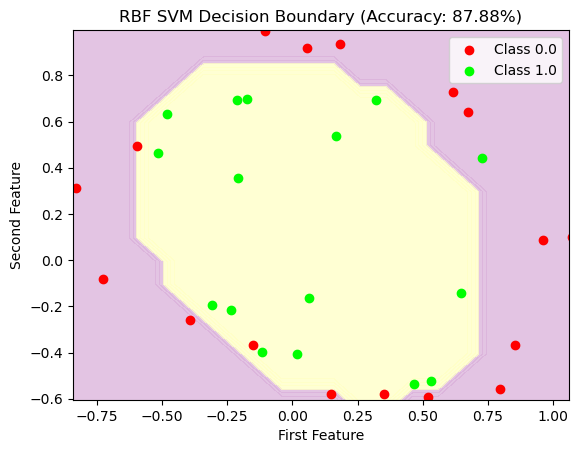

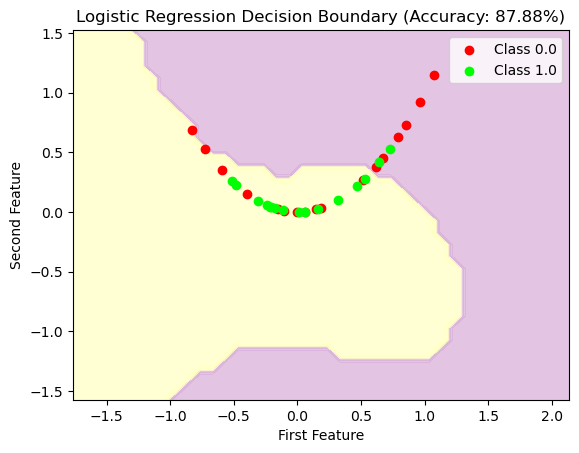

In [9]:
##############################################################################
#                   TODO: Plot the Decision Boundary                         #
##############################################################################

from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_logistic_boundary(X_test, Y_test, weights, bias):
    X1, X2 = np.meshgrid(np.arange(start=X_test[0, :].min() - 0.1, stop=X_test[0, :].max() + 0.1, step=0.01),
                         np.arange(start=X_test[1, :].min() - 0.1, stop=X_test[1, :].max() + 0.1, step=0.01))
    # Your plotting logic here...

# Feature engineering function for visualization
def engineer_features(dataset):
    num_samples = dataset.shape[0]
    num_features = 8
    engineered_data = np.zeros([num_samples, num_features])
    
    engineered_data[:, 0:2] = dataset[:, 0:2]
    engineered_data[:, 2] = dataset[:, 0]**2
    engineered_data[:, 3] = dataset[:, 1]**2
    engineered_data[:, 4] = dataset[:, 0] * dataset[:, 1]
    engineered_data[:, 5] = dataset[:, 0]**3
    engineered_data[:, 6] = dataset[:, 1]**3
    engineered_data[:, 7] = dataset[:, 0]**2 * dataset[:, 1]

    return engineered_data

# Example data and model setup (assuming these variables are defined)
feature_set, label_set = feature_scaler.inverse_transform(test_features), test_labels
X1, X2 = np.meshgrid(np.arange(start=feature_set[:, 0].min() - 0.01, stop=feature_set[:, 0].max() + 0.01, step=0.1), 
                     np.arange(start=feature_set[:, 1].min() - 0.01, stop=feature_set[:, 1].max() + 0.01, step=0.1))

# Calculate RBF SVM accuracy
rbf_predictions = rbf_model.predict(test_features)
rbf_accuracy = np.mean(rbf_predictions == test_labels) * 100

# Decision boundary plot
plt.contourf(X1, X2, 
             rbf_model.predict(feature_scaler.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), 
             alpha=0.75, cmap=ListedColormap(['#DAB1DA', '#FFFFC5']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(label_set)):
    plt.scatter(feature_set[label_set == j, 0], feature_set[label_set == j, 1], 
                color=ListedColormap(['#FF0000', '#00FF00'])(i), label=f'Class {j}')
plt.title(f'RBF SVM Decision Boundary (Accuracy: {rbf_accuracy:.2f}%)')
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.legend()
plt.show()

# Logistic regression decision boundary plot
X1, X2 = np.meshgrid(np.arange(start=test_features[:, 0].min() - 0.01, stop=test_features[:, 0].max() + 0.01, step=0.1), 
                     np.arange(start=test_features[:, 1].min() - 0.01, stop=test_features[:, 1].max() + 0.01, step=0.1))

visualization_data = engineer_features(np.column_stack([X1.ravel(), X2.ravel()]))
data_frame = pd.DataFrame(visualization_data, columns=['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8'])
features = data_frame.iloc[:, :8]
feature_matrix = features.values.T
boundary = np.array(activation_function(np.dot(optimized_weights.T, feature_matrix) + bias) > 0.5, dtype='int64').reshape(X1.shape)

# Calculate logistic regression accuracy
logistic_predictions = (activation_function(np.dot(optimized_weights.T, X_test_copy) + bias) > 0.5).astype(int)
logistic_accuracy = np.mean(logistic_predictions.flatten() == y_test_matrix.flatten()) * 100

plt.contourf(X1, X2, boundary, alpha=0.75, cmap=ListedColormap(['#DAB1DA', '#FFFFC5']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

test_features_transposed = X_test_copy.T
test_labels_flat = y_test_matrix.ravel()

for i, j in enumerate(np.unique(test_labels_flat)):
    plt.scatter(test_features_transposed[:, 0][test_labels_flat == j], 
                test_features_transposed[:, 1][test_labels_flat == j], 
                color=ListedColormap(['#FF0000', '#00FF00'])(i), label=f'Class {j}')
plt.title(f'Logistic Regression Decision Boundary (Accuracy: {logistic_accuracy:.2f}%)')
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.legend()
plt.show()

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Based on your data and plot, you should then briefly discuss which one has better performance and why.

**Your Answer:**  Although the accuracy levels of the logistic regression and SVM with RBF kernel models are equal, the graphical display indicates that the SVM with RBF kernel provides a better seperation between the two classes than the logistic regression model. The SVM contour plot indicates a clearer seperation between model, suggesting that the SVM with RBF kernel is a better fit for this dataset.